##  L'implementation de l'OCR

In [1]:
import pytesseract
from PIL import Image
from pytesseract import Output
import json
import cv2

In [2]:
img_file = "data/Genova.png"
no_noise = "temp/no_noise.png"



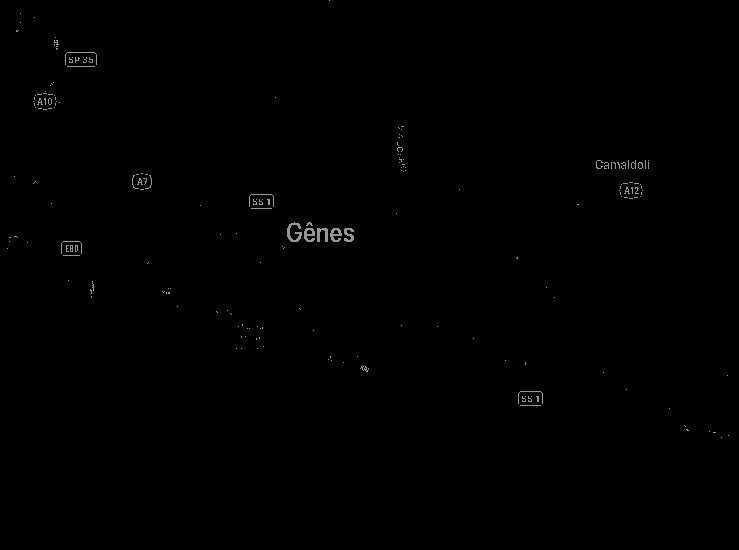

In [3]:
img1 = Image.open(no_noise)
display(img1)

In [4]:
myconfig = r'--oem 3 --psm 6 -l fra '

In [5]:
# # Utiliser Tesseract pour extraire des données sur le texte
data = pytesseract.image_to_data(img1, config=myconfig, output_type=Output.DICT)


In [6]:
# Extraire les informations sur le texte, la position et la confiance pour les mots avec un taux de confiance supérieur à 80%
texts = []
for i in range(len(data['text'])):
    # Vérifier si le texte extrait est valide et a une position définie
    if int(data['conf'][i]) > 85 and 'text' in data and 'left' in data and 'top' in data and 'width' in data and 'height' in data:
        # Créer un dictionnaire contenant le texte, la position et la confiance
        text_info = {
            'text': data['text'][i],
            'left': data['left'][i],
            'top': data['top'][i],
            'width': data['width'][i],
            'height': data['height'][i],
            'conf': data['conf'][i]
        }
        texts.append(text_info)

# Enregistrer les informations extraites dans un fichier JSON
with open('infos_texte.json', 'w') as json_file:
    json.dump(texts, json_file, indent=4)

print("Les informations ont été enregistrées dans 'infos_texte.json'.")

Les informations ont été enregistrées dans 'infos_texte.json'.
